# Importing modules

In [1]:
import MetaTrader5 as mt5
import functions as fp
import matplotlib.pyplot as plt

## Connecting to MT5 server

In [2]:
mt5.initialize()

True

## Login to MT5

In [3]:
login = input('Enter your login: ')
password = input('Enter your password: ')
server = input('Enter the server name: ')

if not login:
    login = "SsaliBenjamin"

if not password:
    password = "PRKJRAYr"
    
if not server:
    server = "MetaQuotes-Demo"

# Use a default port value if the user does not provide input
port = input('Enter the server port: ')
if not port:
    port = 8222
else:
    port = int(port)

# Attempt to log in to the server and handle any errors that may occur
try:
    result = mt5.login(login, password, server, port)
    if result == 0:
        print('Successfully logged in')
    else:
        print('Login failed')
except Exception as e:
    print(f'An error occurred while attempting to log in: {e}')

Successfully logged in


## Getting data from high frequency server

In [4]:
# Get data for the past 24hrs
data = fp.fetchPastData(mt5)
# Filter data 
data = fp.filterData(data)
# Calculate EMA, RSI, ATR, and MACD 
data = fp.calcTools(data)
# Store in JSON
data.to_csv('./pastdata.csv', index=False)


## Create and store orders in order book.

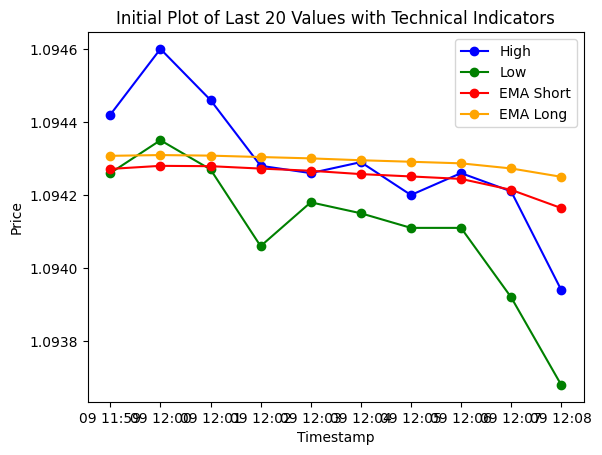

<Figure size 640x480 with 0 Axes>

Buy: 2024-01-09 08:15:00, Price: 1.0953, Capital: 9998.9047
Sell: 2024-01-09 08:36:00, Price: 1.09499, Capital: 9999.999689999999
Buy: 2024-01-09 08:44:00, Price: 1.09524, Capital: 9998.904449999998
Sell: 2024-01-09 08:47:00, Price: 1.09509, Capital: 9999.999539999999
Buy: 2024-01-09 09:11:00, Price: 1.09531, Capital: 9998.904229999998
Sell: 2024-01-09 10:04:00, Price: 1.09544, Capital: 9999.999669999997
Buy: 2024-01-09 10:57:00, Price: 1.09496, Capital: 9998.904709999997
Sell: 2024-01-09 11:10:00, Price: 1.0943100000000001, Capital: 9999.999019999997


<Figure size 640x480 with 0 Axes>

In [5]:
 # Set up the initial plot
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()

# Display inital tick data:
fp.displayTicks(data,plt, ax)
plt.show()
while(True):
    data = fp.ticksUpdate(mt5,data,plt, ax)
    plt.draw()
    plt.pause(60)
    plt.clf()
    fp.someStrategy(data)
    

In [ ]:
data

## Shutdown MT5.

In [ ]:
mt5.shutdown()